### ОПИСАНИЕ ПРОЕКТА

Для данного проекта из открытых источников были взяты исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). В ходе проекта поставлена задача выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

ШАГ 1. Импортируем необходимые библиотеки, считываем файл

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
games=pd.read_csv('/datasets/games.csv')

Создаем функцию по описанию данных  

In [ ]:
def data_review (data):
    print('Первые 10 строк:')
    display(data.head(10))
    print('Последние 10 строк:')
    display(data.tail(10))
    print('ТИПЫ ДАННЫХ\n')
    display(data.info())
    print('СТАТИСТИЧЕСКАЯ СВОДКА')
    display(data.describe())
    print('ПРОПУСКИ\n')
    for element in data.columns:
        if data[element].isna().sum() > 0:
            print(element, ' - ', data[element].isna().sum(), 'пропусков')
            count = +1
        if count == 0:
            print('Пропусков НЕТ\n')
    print('\nПРОЦЕНТ ПРОПУСКОВ ИЗ ВСЕГО ДАТАСЕТА')
    display(data.isna().mean().sort_values(ascending=False)*100)
    print('\nДУБЛИКАТЫ\n')
    if data.duplicated().sum() > 0:
        print('Дубликатов: ', data.duplicated().sum())
    else:
        print('Дубликатов НЕТ')

In [ ]:
data_review (games)

Первые 10 строк:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Последние 10 строк:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


ТИПЫ ДАННЫХ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

СТАТИСТИЧЕСКАЯ СВОДКА


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


ПРОПУСКИ

Name  -  2 пропусков
Year_of_Release  -  269 пропусков
Genre  -  2 пропусков
Critic_Score  -  8578 пропусков
User_Score  -  6701 пропусков
Rating  -  6766 пропусков

ПРОЦЕНТ ПРОПУСКОВ ИЗ ВСЕГО ДАТАСЕТА


Critic_Score       51.319174
Rating             40.478612
User_Score         40.089740
Year_of_Release     1.609333
Name                0.011965
Genre               0.011965
Platform            0.000000
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
dtype: float64


ДУБЛИКАТЫ

Дубликатов НЕТ


In [ ]:
games.loc[games.duplicated(['Name', 'Platform', 'Year_of_Release'])]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [ ]:
games.loc[
    ((games['Name'].isna()) &
    (games['Platform'] == 'GEN') &
    (games['Year_of_Release'] == 1993)) |
    ((games['Name'] == 'Madden NFL 13') &
    (games['Platform'] == 'PS3') &
    (games['Year_of_Release'] == 2012))
]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Вероятно дублирование строк произошло от того, что что данные о продажах в разных регионах разнеслись в разные строки. Можно сложить данные о продажах в первую строку, а вторую удалить.

In [ ]:
games.loc[games.index == 604, 'EU_sales'].add(games.loc[games.index == 16230, 'EU_sales'])
games = games.loc[games.index != 16230]
# Проверка наличия дубликата
games.loc[
    (games['Name'] == 'Madden NFL 13') &
    (games['Platform'] == 'PS3') &
    (games['Year_of_Release'] == 2012)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E


<b>Описание данных:<b>
    

Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска   
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating   Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<b> ВЫВОД  
Всего в датасете 16715 записей, названия столбцов мы будем приводить к нижнему регистру. Имеется большое кол-во пропусков в колонках сritic_score 8578 - 51,3%, rating -  6766 (40,5%), User_Score 6701 (40,1% пропусков). Явных дубликатов в датасете нет, неявные объединены (тот, который без названия игры и жанра удалим в последующем). Из "неправильных" форматов данных пока обнаружены только вещественные числа в столбце "Год выпуска" ('year_of_release'), а также 'object' в "Оценке пользователей" (user_score), столбец (critic_score) можно привести к целочисленному значению, *_только при рассчете корреляции это вызовет проблемы_*.  

Шаг 2. Подготавливаем данные

2.1. Меняем названия столбцов, приводим к нижнему регистру:

In [ ]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

2.2. Преобразуйте данные в нужные типы.

В первую очередь заменим тип данных 'year_of_release' на целочисленный

In [ ]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
#games['critic_score'] = games['critic_score'].astype('Int64')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16714 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16714 non-null  object 
 2   year_of_release  16445 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16714 non-null  float64
 5   eu_sales         16714 non-null  float64
 6   jp_sales         16714 non-null  float64
 7   other_sales      16714 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


Обработаем пропуски  

Аббревиатура 'tbd' означает 'подлежит уточнению', то есть пока оценка пользователей не получена/не обработана. По сути это пропуск. Заменим на Nan

In [ ]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)

Уберем строки, где отсутствует название игры и год выпуска

In [ ]:
games = games.dropna(subset=['name'])
games = games.dropna(subset=['year_of_release'])

В столбце "рейтинг" пропуски заменим на "неопределен"

In [ ]:
games["rating"] = games['rating'].fillna("undefined")
games.rating.unique()

array(['E', 'undefined', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

«E» («Everyone») — «Для всех»
«M» («Mature») — «Для взрослых»
«T» («Teen») — «Подросткам»
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
«EC» («Early childhood») — «Для детей младшего возраста»  

In [ ]:
games['critic_score'] = games['critic_score'].fillna('-1')
games['critic_score'] = games['critic_score'].astype('float')
games['user_score'] = games['user_score'].fillna('-1')
games['user_score'] = games['user_score'].astype('float')

In [ ]:

games['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [ ]:
games['total_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


<b> В итоге мы заменили названия столбцов на нижний регистр, удалили строки, где информация о годе выпуска и называния отсутствуют. Заменили пропуски в оценках на "-1" и привели к нужному типу (что потребуется для рассчета корреляции и диаграммы рассеяния), посчитали общий объем продаж.

In [ ]:

# Посмотрим, что осталось
temp = games.copy()
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
name : ко

Шаг 3. Проведем исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [ ]:
print(games['name'].nunique())

11426


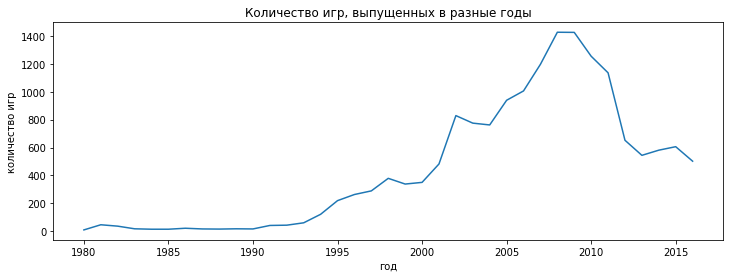

In [ ]:
years=games.groupby('year_of_release')['name'].count()
plt.figure(figsize=(12,4))
plt.plot(years)
plt.xlabel('год')
plt.ylabel('количество игр')
plt.title('Количество игр, выпущенных в разные годы')
plt.show()

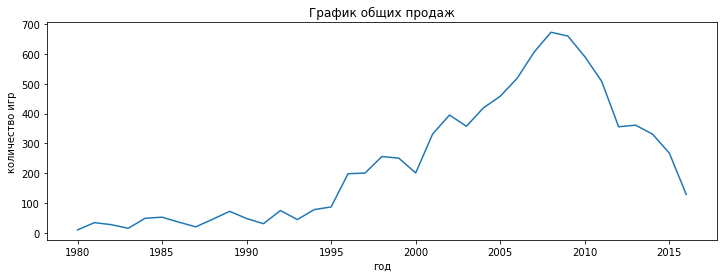

In [ ]:
years1=games.groupby('year_of_release')['total_sales'].sum()
plt.figure(figsize=(12,4))
plt.plot(years1)
plt.xlabel('год')
plt.ylabel('количество игр')
plt.title('График общих продаж')
plt.show()

<b> На графике видно, что рост начинается с 1992-93 г., с 2000 до 2009 года наблюдается резкий скачок спроса (с небольшим двухлетним замедлением 2002-2004), а затем годовая стагнация, резкий спад до 2013 г. и вновь стагнация/медленное падение. На 2008 и 2009 год приходится пик продаж, значит в эти года производили больше всего игр (1427 и 1426 игр соответсвенно).

Совместим графики количества выпущенных игр и общих продаж (**без осей, просто для наглядности, убрать его нетрудно**).

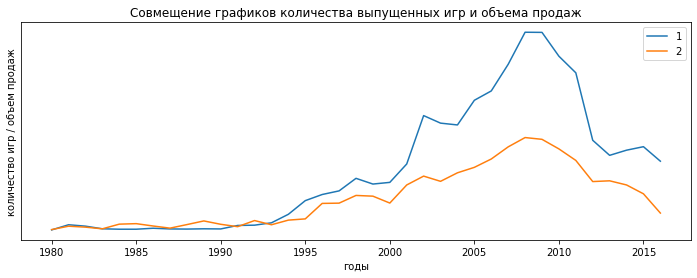

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(years)
plt.plot(years1)
#plt.xlabel('год')
plt.title('Совмещение графиков количества выпущенных игр и объема продаж')
plt.yticks([])  # Disable yticks
plt.xlabel('годы')
plt.ylabel('количество игр / объем продаж')
plt.legend('12')
plt.show()


Совмещение графиков количества выпущенных игр и объема продаж демонстрирует, что рост количества выпускаемых игр кратно увеличивает объемы продаж.

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [ ]:
print('В данном исследовании рассмотрены игры на следующих платформах: ')
print(games['platform'].unique())
n_plat=games['platform'].nunique()
print(f'Всего рассмотрено: {n_plat} платформ(а)')

В данном исследовании рассмотрены игры на следующих платформах: 
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Всего рассмотрено: 31 платформ(а)


Рассмотрим развернуто:

In [ ]:
platform_years = games.pivot_table(
    index=('platform', 'year_of_release'),
    values=(
        'total_sales',
    ),
    aggfunc=('count', 'sum'))

In [ ]:
 from matplotlib.axes._axes import _log as matplotlib_axes_logger
 matplotlib_axes_logger.setLevel('ERROR')

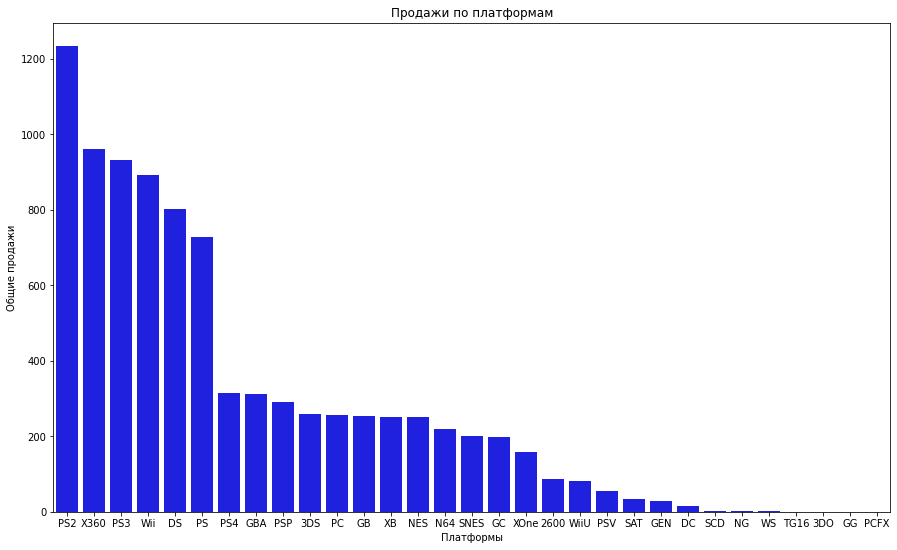

In [ ]:
platform_sales = (games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)
plt.figure(figsize=(15, 9))
(sns.barplot(data = platform_sales, x = platform_sales.index, y = 'total_sales', color = 'blue')
    .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

In [ ]:
# Напишем функцию, которая будет возвращать нужную сводную таблицу и выводить данные с 2005 года
def year_total_sale_for_platform(name, data):
    slicee = data[(data['platform'] == name) & (data['year_of_release'] > 2004)]
    total = slicee.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total
# Создадим свою таблицу по платформам и их обшим продажам. отсортируем их по убыванию и оставим только топ 5.
top_5_platforms = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)
#Выведем топ 5 продаваемых платформ
top_5_platforms

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78


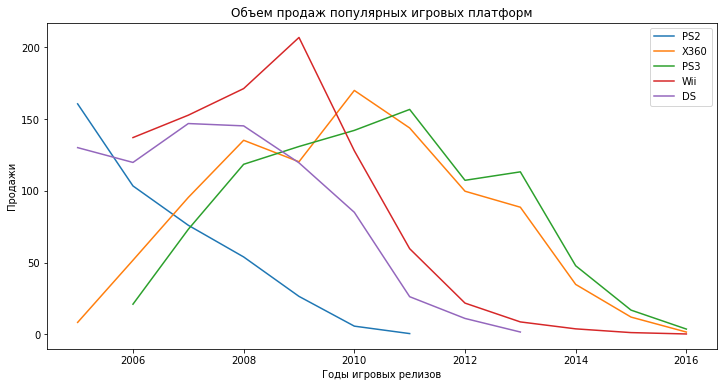

In [ ]:
#Отрисуем популярные платформы и их поведение
plt.figure(figsize=(12,6))
plt.title('Объем продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_5_platforms['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i,games)['total_sales'], label=i)
    plt.legend()

In [ ]:
# Комментарий ревьюера
time_life = games.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона,
                                                            # поэтому +1
time_life['life'].median()

7.0

- Практически все игровые платформы в среднем сущеcтвуют 7 лет.
- Cамые продаваемые это Play Station и XBOX
- Самый пик - через 3-5 лет после выхода приставки
- у Nintento WII был быстрый скачок в 2009 году и такой же резкий провал

<b> ПРОМЕЖУТОЧНЫЙ ВЫВОД

Наибольшее количество продаж было у игр для PS2, что объясняется популярностью предшествующей PS, также и последующие релизы платформы (как мы уже знаем) стали успешны.
Остальные консоли не могут похвастаться таким объемом продаж. Новые платформы быстро набирают популярность, наращивают/удерживают ее в течение 3-5 лет и затем их продажи снижаются.
При этом видно, что из представленного ТОПа не все платформы еще являются актуальными, в частности сменились "поколения", PS уже в 5м издании, X360 уже поменяло несколько поколений XOne. Есть еще ряд факторов, влияющих на появление и исчезновение платформ. Например, PSP некогда был популярен как мобильная версия PS, но с развитием смартфонов данный формат стал неактуален.

<b> Возьмем данные за актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год. Актуальным периодом будем считать период с 2014, когда спад интереса прекратился и вышел в период стабильного спроса.

In [ ]:
actual_games = games.query('year_of_release >= 2014').copy()
actual_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,undefined,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,undefined,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,undefined,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,undefined,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,undefined,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,undefined,0.01


In [ ]:
actual_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   Int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     1689 non-null   float64
 9   user_score       1689 non-null   float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 173.2+ KB


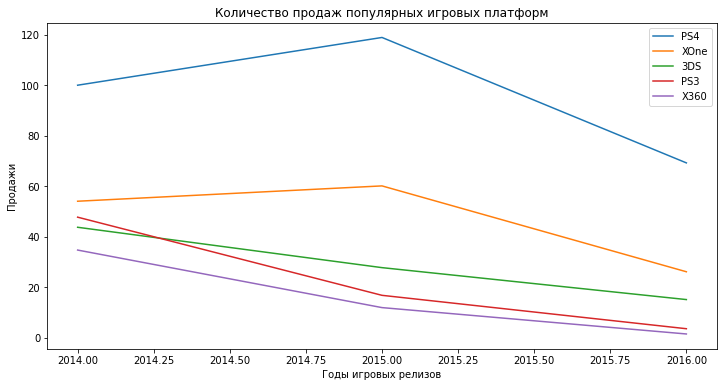

In [ ]:
# Напишем функцию, которая будет возвращать нужную сводную таблицу и выводить данные с 2005 года
def actual_platform(name, data):
    slicee = data[(data['platform'] == name) & (data['year_of_release'] > 2013)]
    total = slicee.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total
# Создадим свою таблицу по платформам и их обшим продажам. отсортируем их по убыванию и оставим только топ 5.
top_5_plat = actual_games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
top_5_plat = top_5_plat.reset_index().rename_axis(None, axis=1)
#Выведем топ 5 продаваемых платформ
top_5_plat
#Отрисуем все игровые платформы и их поведение за последние 10 лет
plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_5_plat['platform']):
    sns.lineplot(data=actual_platform(i,actual_games)['total_sales'], label=i)
    plt.legend()

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

<b> В актуальный период 2014-2016 в топ-5 платформ попали PS4, XOne, 3DS, PS3, X360

In [ ]:
# Комментарий ревьюера
games.year_of_release.min()

1980

In [ ]:
#list_of_top5 = ['PS4','X360','PS3','XOne','3DS']
#top5 = actual_games[actual_games['platform'].isin(['PS4','X360','PS3','XOne','3DS'])]
#top5 = top5[top5['total_sales']<1.4]
#plt.figure(figsize=(12,6))
#actual_platform = actual_games[actual_games['platform']]
#sns.boxplot(data=actual_platform, x='platform', y='total_sales')

#plt.xlabel('Платформа', fontsize=12)
#plt.ylabel('Глобальные продажи',fontsize=12)


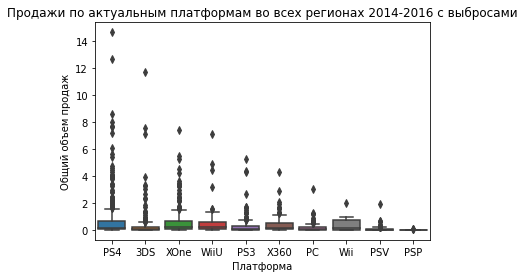

In [ ]:
sns.boxplot(
    x=actual_games.rename(columns={
        'platform':'Платформа'
    })['Платформа'],
    y=actual_games.rename(columns={
        'total_sales':'Общий объем продаж'
    })['Общий объем продаж']
);
sns.set(rc={"figure.figsize":(15, 9)})
plt.title('Продажи по актуальным платформам во всех регионах 2014-2016 с выбросами')
plt.show()

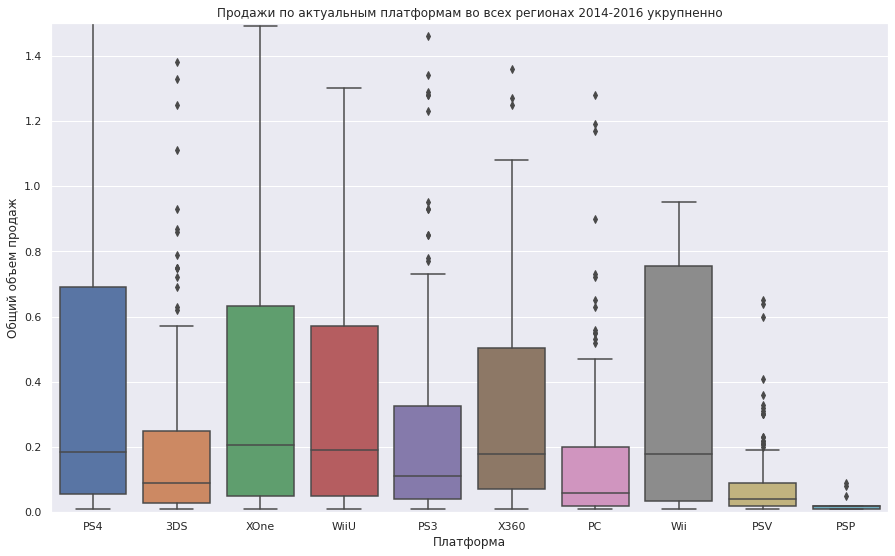

In [ ]:
#Укрупняем "ящики"
sns.boxplot(
    x=actual_games.rename(columns={
        'platform':'Платформа'
    })['Платформа'],
    y=actual_games.rename(columns={
        'total_sales':'Общий объем продаж'
    })['Общий объем продаж']
);
sns.set(rc={"figure.figsize":(15, 9)})
plt.ylim(0, 1.5)
plt.title('Продажи по актуальным платформам во всех регионах 2014-2016 укрупненно')
plt.show()

Из диаграмм размаха можно сделать вывод, что распределение продаж среди платформ PS4, XOne, X360 примерно одинаковое, но необходимо отметить большое количество значений, выходящих за пределы 3го квартиля и большое количество выбросов, очевидно, это самые попуярные игры. Также в этом отношении неплохо выглядит PS3. Еще 2 платформы (Wii и WiiU) показывают неплохие продажи, при этом медиана на общем уровне, а выбросов, говорящих о хитах продаж и бестселлерах очевидно меньше.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.Соотнесите выводы с продажами игр на других платформах.

In [ ]:

print(len(games.query('critic_score != -1')))
print(len(games.query('user_score != -1 ')))
print(len(games.query('critic_score != -1 & user_score != -1 ')))

7982
7462
6893


In [ ]:
PS4_critic = actual_games.query('platform == "PS4" & critic_score != -1' )
PS4_user = actual_games.query('platform == "PS4" & user_score != -1 ')
#PS4_critic.info()

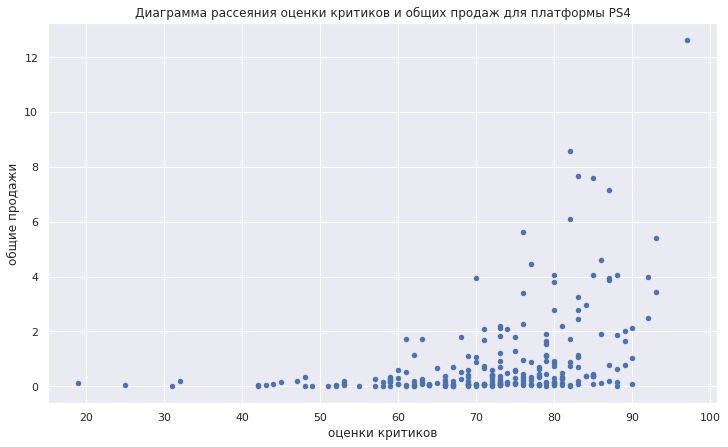

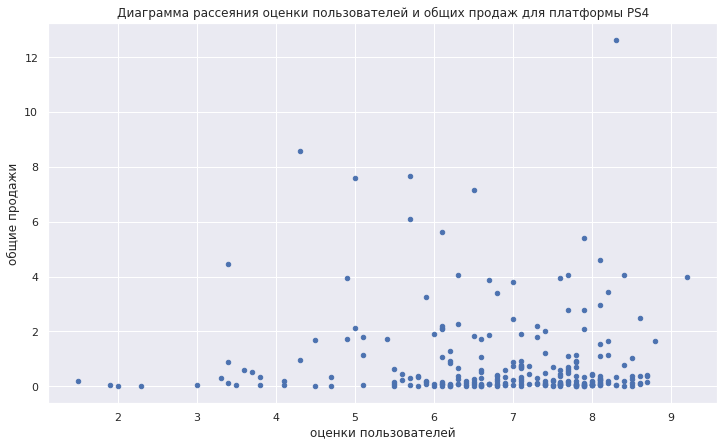

In [ ]:
PS4_critic['critic_score']=PS4_critic['critic_score'].astype('Float64')
PS4_critic.plot(
    kind='scatter',
    x='critic_score',
    y='total_sales',
    figsize = (12,7),
    title='Диаграмма рассеяния оценки критиков и общих продаж для платформы PS4')
plt.xlabel("оценки критиков")
plt.ylabel("общие продажи")
PS4_user.plot(
    kind='scatter',
    x='user_score',
    y='total_sales',
    figsize = (12,7),
    title='Диаграмма рассеяния оценки пользователей и общих продаж для платформы PS4'),
plt.xlabel("оценки пользователей")
plt.ylabel("общие продажи")
plt.show()

In [ ]:
corr_critics=PS4_critic['critic_score'].astype('float64').corr(PS4_critic['total_sales'])
corr_user=PS4_user['user_score'].corr(PS4_user['total_sales'])
print ('Для PS4 корреляция оценки критиков и общих продаж: ', corr_critics)
print ('Для PS4 корреляция оценки пользователей и общих продаж: ', corr_user)

Для PS4 корреляция оценки критиков и общих продаж:  0.40266141068104083
Для PS4 корреляция оценки пользователей и общих продаж:  -0.040131589472697356


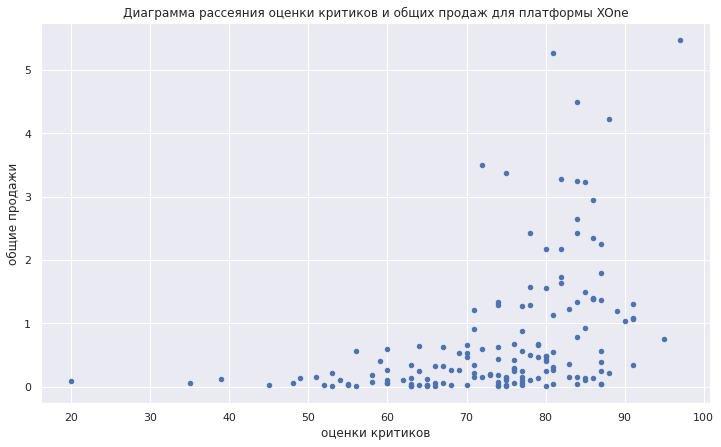

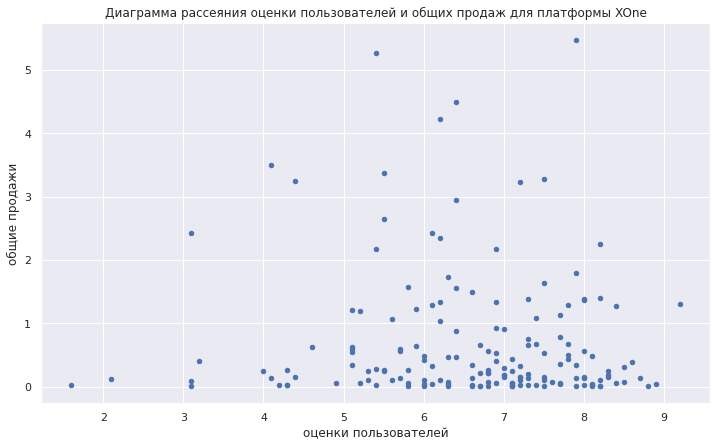

In [ ]:
XOne_critic = actual_games.query('platform == "XOne" & critic_score != -1' )
XOne_user = actual_games.query('platform == "XOne" & user_score != -1 ')

XOne_critic.plot(
    kind='scatter',
    x='critic_score',
    y='total_sales',
    figsize = (12,7),
    title='Диаграмма рассеяния оценки критиков и общих продаж для платформы XOne')
plt.xlabel("оценки критиков")
plt.ylabel("общие продажи")
XOne_user.plot(
    kind='scatter',
    x='user_score',
    y='total_sales',
    figsize = (12,7),
    title='Диаграмма рассеяния оценки пользователей и общих продаж для платформы XOne'),
plt.xlabel("оценки пользователей")
plt.ylabel("общие продажи")
plt.show()

In [ ]:
corr_critics1=XOne_critic['critic_score'].astype('float64').corr(XOne_critic['total_sales'])
corr_user1=XOne_user['user_score'].corr(XOne_user['total_sales'])
print ('Для XOne корреляция оценки критиков и общих продаж: ', corr_critics1)
print ('Для XOne корреляция оценки пользователей и общих продаж: ', corr_user1)

Для XOne корреляция оценки критиков и общих продаж:  0.42867694370333226
Для XOne корреляция оценки пользователей и общих продаж:  -0.0703839280647581


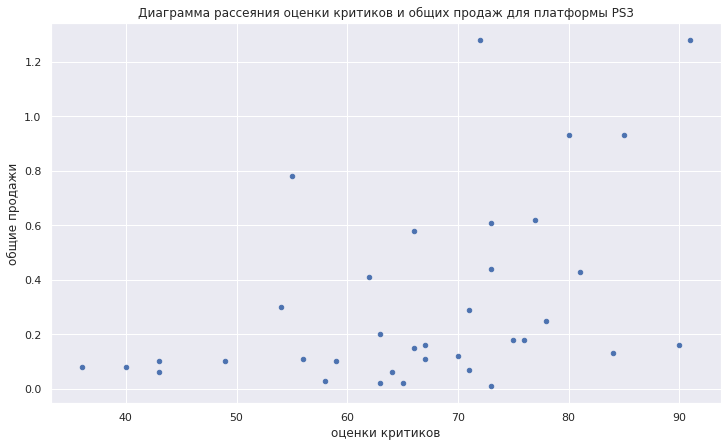

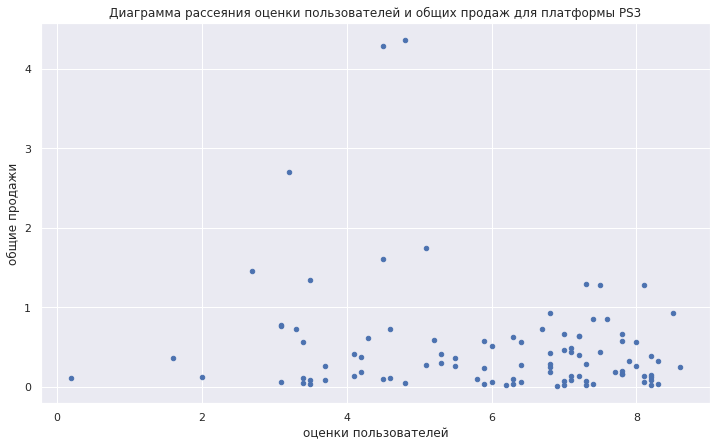

In [ ]:
PS3_critic = actual_games.query('platform == "PS3" & critic_score != -1' )
PS3_user = actual_games.query('platform == "PS3" & user_score != -1 ')

PS3_critic.plot(
    kind='scatter',
    x='critic_score',
    y='total_sales',
    figsize = (12,7),
    title='Диаграмма рассеяния оценки критиков и общих продаж для платформы PS3')
plt.xlabel("оценки критиков")
plt.ylabel("общие продажи")
PS3_user.plot(
    kind='scatter',
    x='user_score',
    y='total_sales',
    figsize = (12,7),
    title='Диаграмма рассеяния оценки пользователей и общих продаж для платформы PS3'),
plt.xlabel("оценки пользователей")
plt.ylabel("общие продажи")
plt.show()

In [ ]:
corr_critics2=PS3_critic['critic_score'].astype('float64').corr(PS3_critic['total_sales'])
corr_user2=PS3_user['user_score'].corr(PS3_user['total_sales'])
print ('Для PS3 корреляция оценки критиков и общих продаж: ', corr_critics2)
print ('Для PS3 корреляция оценки пользователей и общих продаж: ', corr_user2)

Для PS3 корреляция оценки критиков и общих продаж:  0.44657460493190704
Для PS3 корреляция оценки пользователей и общих продаж:  -0.16676141347662118


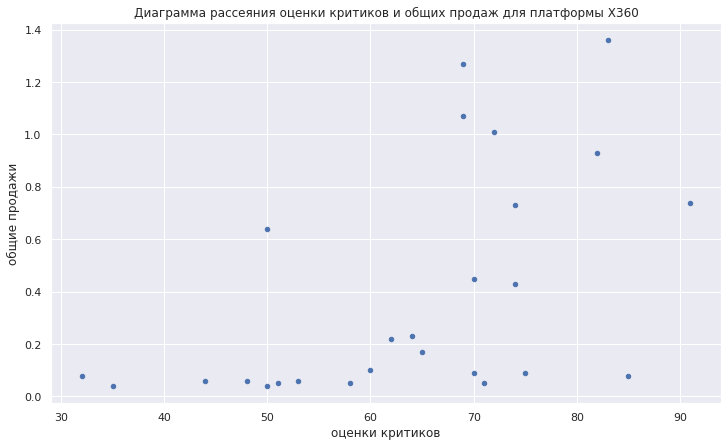

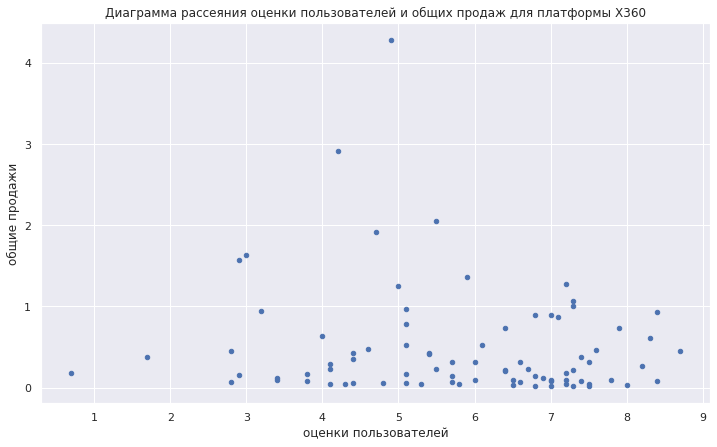

In [ ]:
X360_critic = actual_games.query('platform == "X360" & critic_score != -1' )
X360_user = actual_games.query('platform == "X360" & user_score != -1 ')

X360_critic.plot(
    kind='scatter',
    x='critic_score',
    y='total_sales',
    figsize = (12,7),
    title='Диаграмма рассеяния оценки критиков и общих продаж для платформы X360')
plt.xlabel("оценки критиков")
plt.ylabel("общие продажи")
X360_user.plot(
    kind='scatter',
    x='user_score',
    y='total_sales',
    figsize = (12,7),
    title='Диаграмма рассеяния оценки пользователей и общих продаж для платформы X360'),
plt.xlabel("оценки пользователей")
plt.ylabel("общие продажи")
plt.show()

In [ ]:
corr_critics3=X360_critic['critic_score'].astype('float64').corr(X360_critic['total_sales'])
corr_user3=X360_user['user_score'].corr(X360_user['total_sales'])
print ('Для X360 корреляция оценки критиков и общих продаж: ', corr_critics3)
print ('Для X360 корреляция оценки пользователей и общих продаж: ', corr_user3)

Для X360 корреляция оценки критиков и общих продаж:  0.5257228356581523
Для X360 корреляция оценки пользователей и общих продаж:  -0.138444570945665


Расчет по Платформе 3DS


user_score     0.215193
total_sales    1.000000
Name: total_sales, dtype: float64

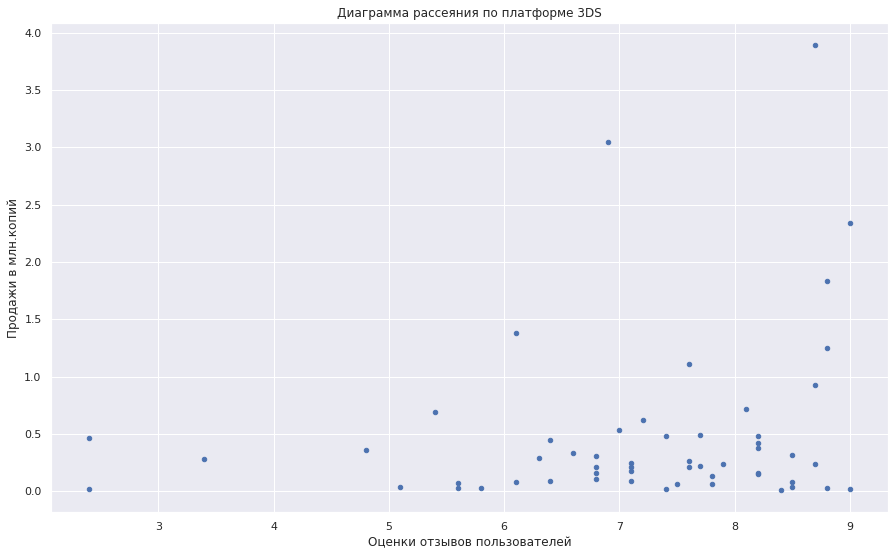

critic_score    0.314117
total_sales     1.000000
Name: total_sales, dtype: float64

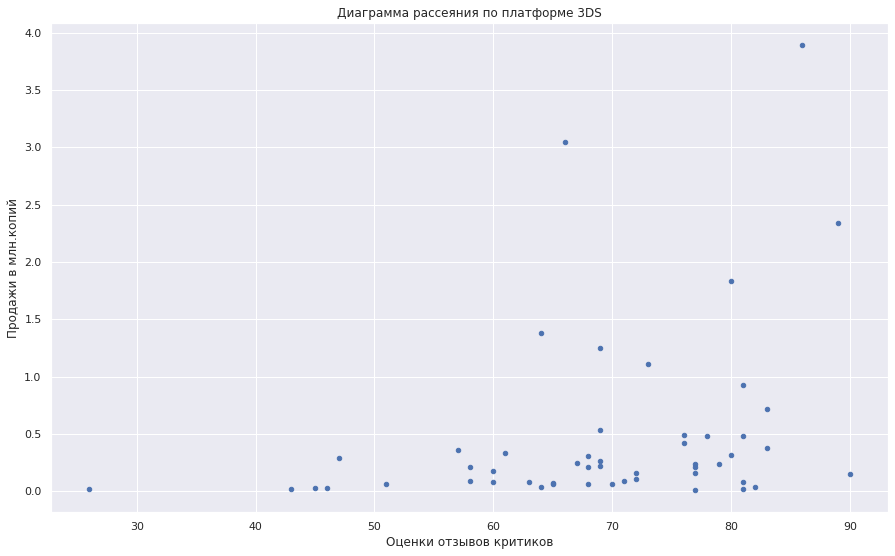

Расчет по Платформе PC


user_score    -0.071597
total_sales    1.000000
Name: total_sales, dtype: float64

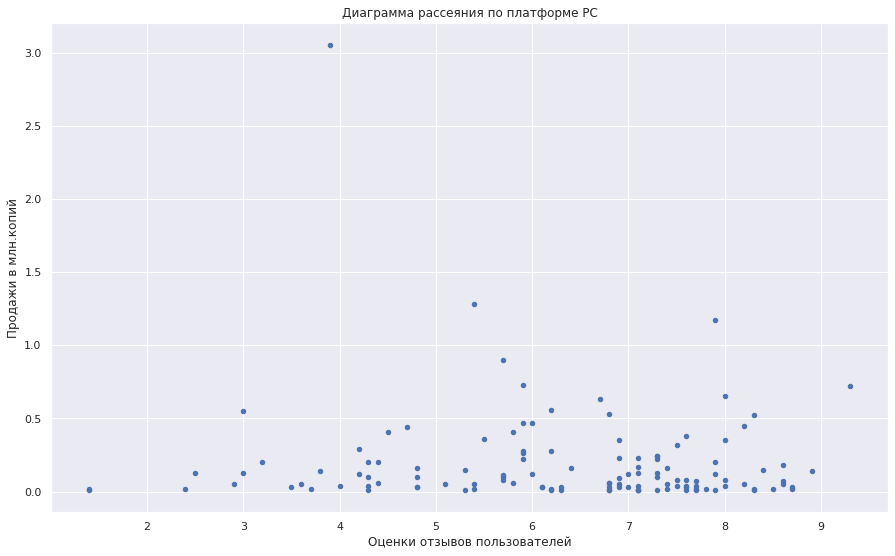

critic_score    0.174634
total_sales     1.000000
Name: total_sales, dtype: float64

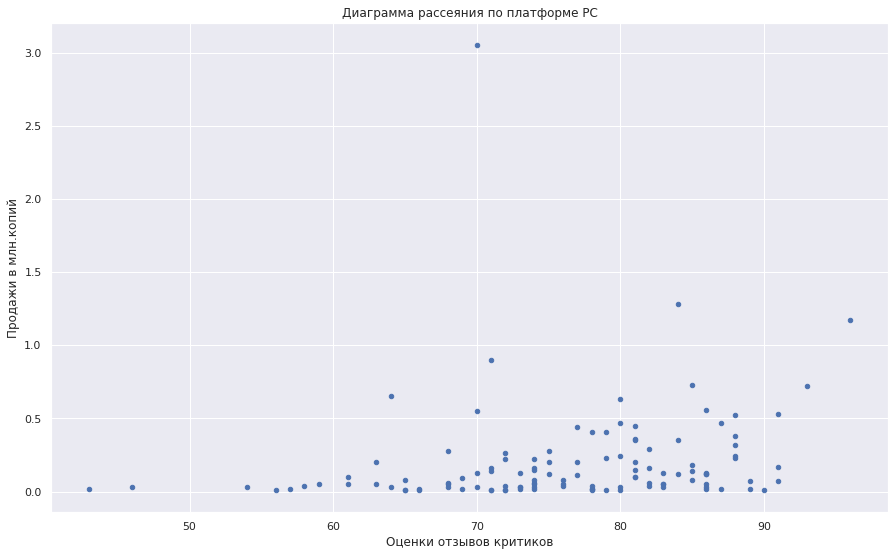

Расчет по Платформе PS3


user_score    -0.166761
total_sales    1.000000
Name: total_sales, dtype: float64

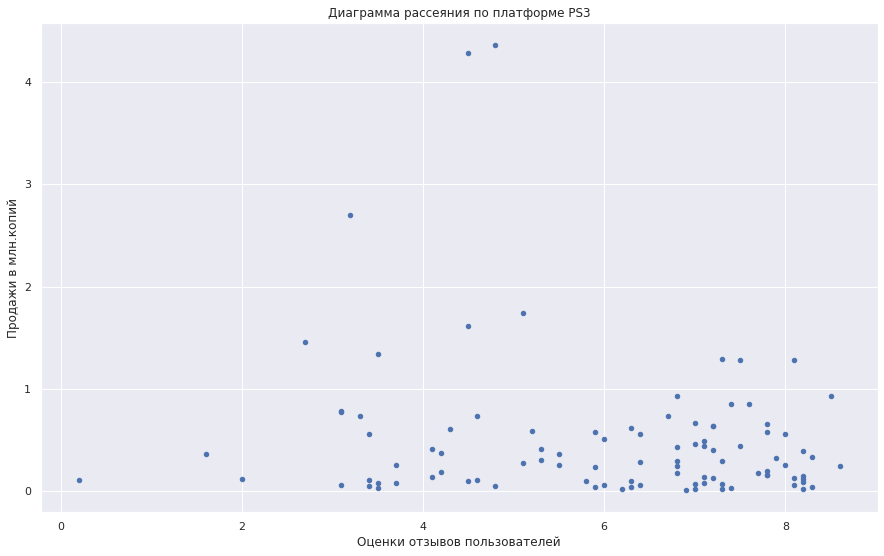

critic_score    0.446575
total_sales     1.000000
Name: total_sales, dtype: float64

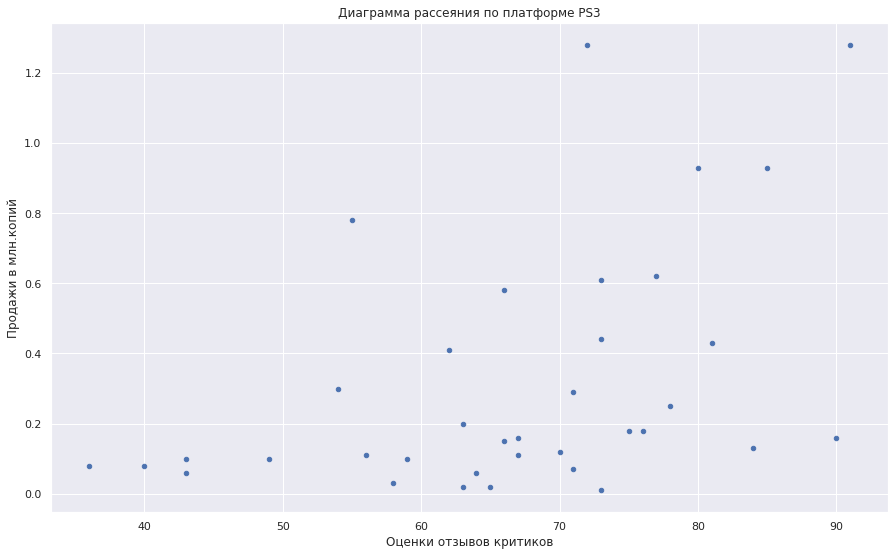

Расчет по Платформе PS4


user_score    -0.040132
total_sales    1.000000
Name: total_sales, dtype: float64

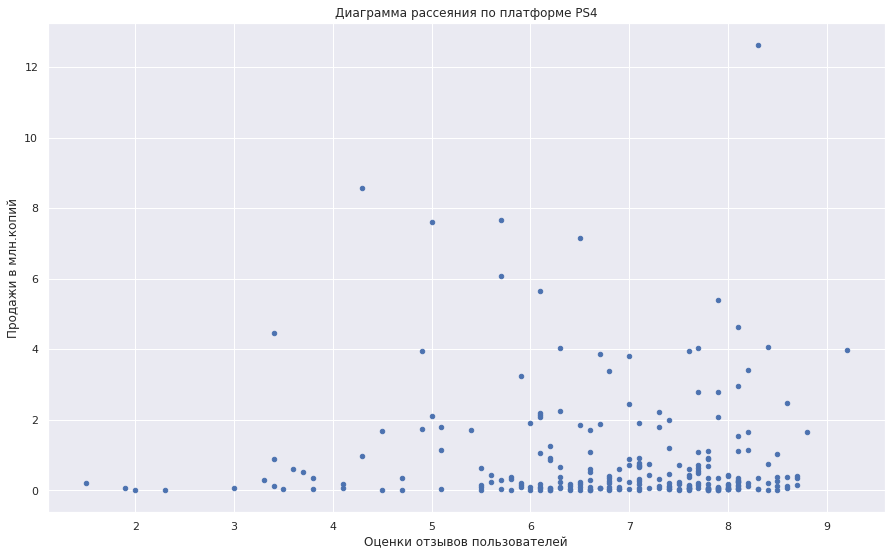

critic_score    0.402661
total_sales     1.000000
Name: total_sales, dtype: float64

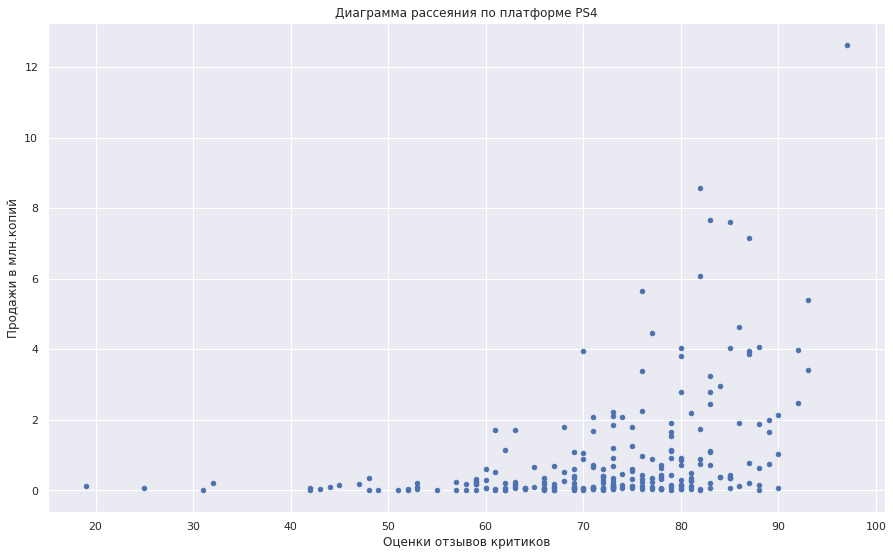

Расчет по Платформе PSP
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе PSV


user_score    -0.168455
total_sales    1.000000
Name: total_sales, dtype: float64

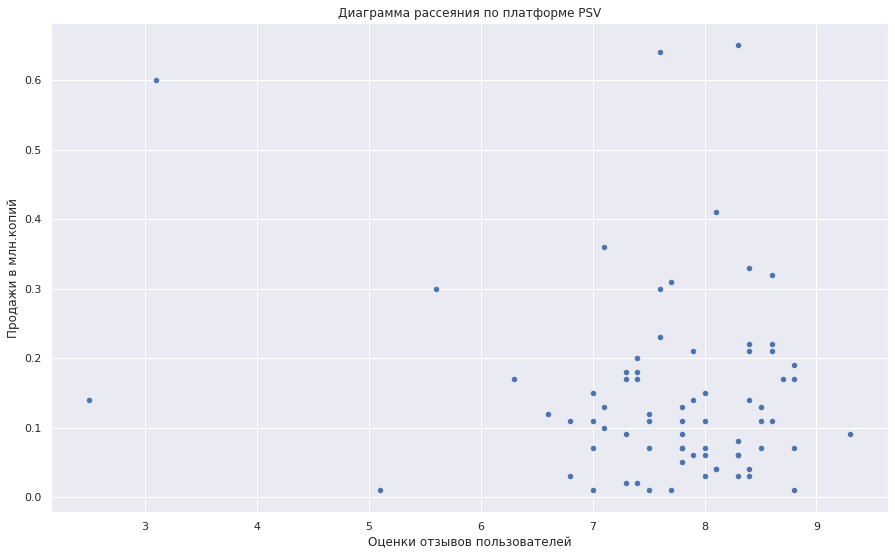

critic_score    0.042665
total_sales     1.000000
Name: total_sales, dtype: float64

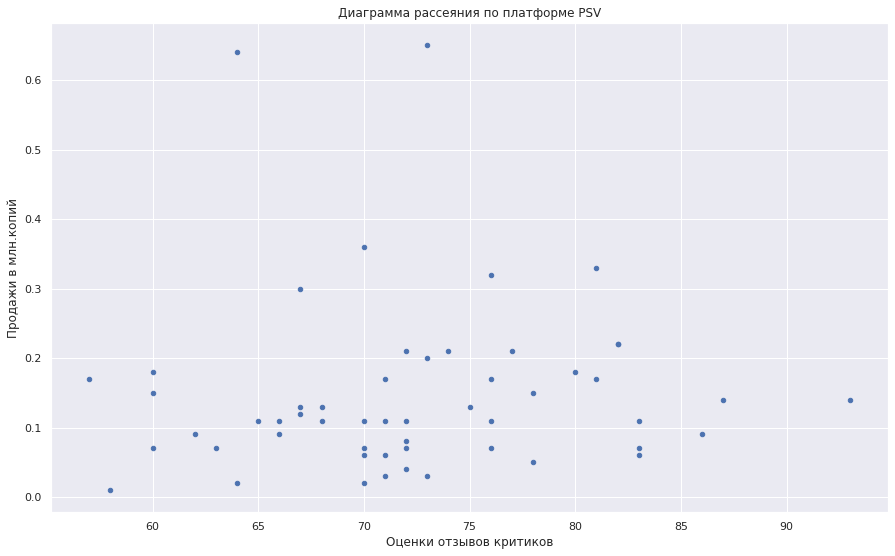

Расчет по Платформе Wii
Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе WiiU


user_score     0.407926
total_sales    1.000000
Name: total_sales, dtype: float64

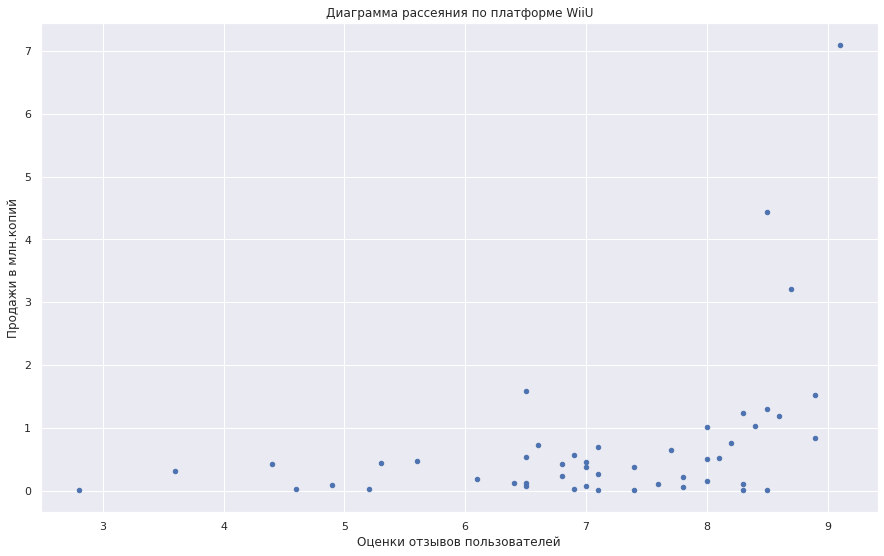

critic_score    0.370201
total_sales     1.000000
Name: total_sales, dtype: float64

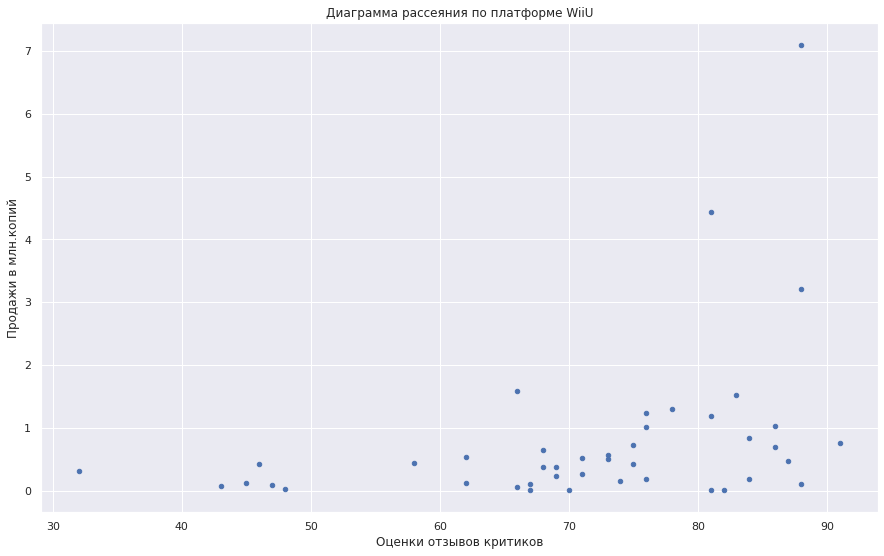

Расчет по Платформе X360


user_score    -0.138445
total_sales    1.000000
Name: total_sales, dtype: float64

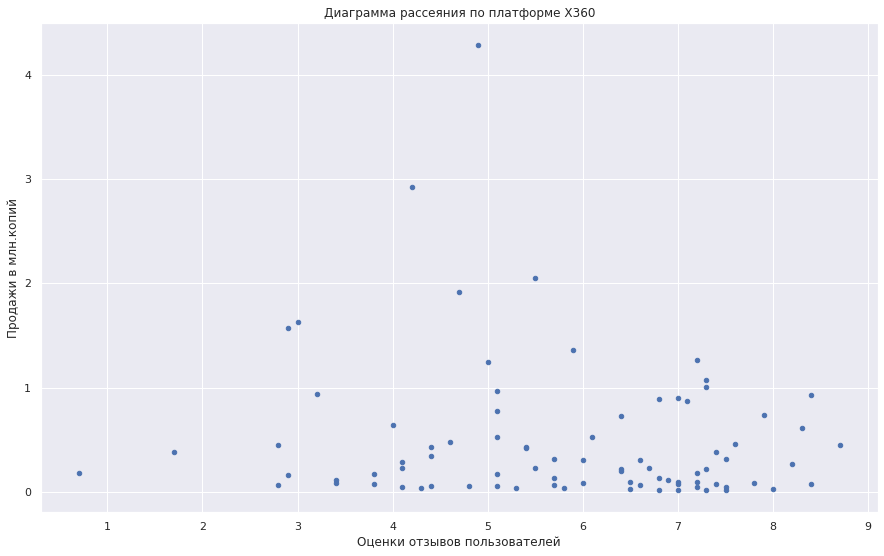

critic_score    0.525723
total_sales     1.000000
Name: total_sales, dtype: float64

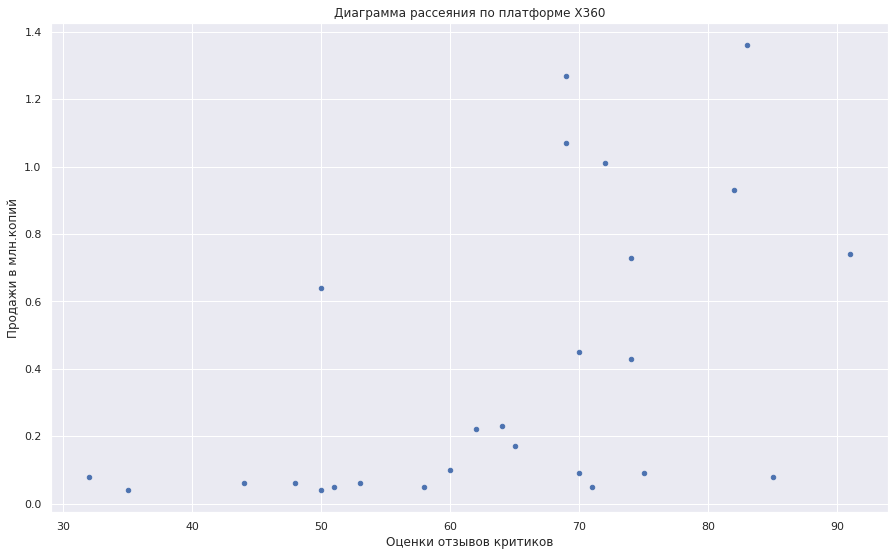

Расчет по Платформе XOne


user_score    -0.070384
total_sales    1.000000
Name: total_sales, dtype: float64

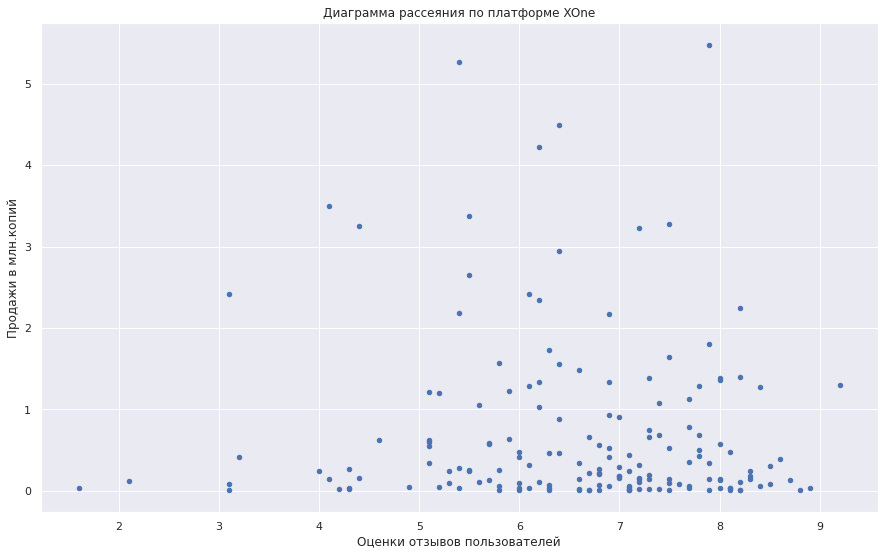

critic_score    0.428677
total_sales     1.000000
Name: total_sales, dtype: float64

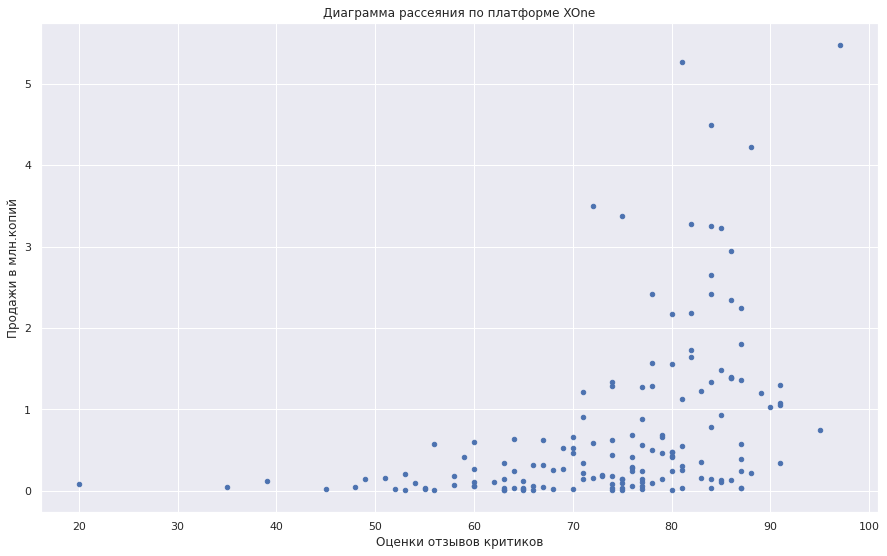

In [ ]:
# вариант написания в цикле
import matplotlib.pyplot as plt
df_sc, y = actual_games.copy(), 'total_sales'
for platform, games_on_pl in df_sc.groupby('platform'):
    print('='*60)
    print('Расчет по Платформе',platform)
    # Считаем сколько в колонке не пустых отзывов
    not_user = len(games_on_pl[(games_on_pl.user_score != -1)&(games_on_pl['user_score'].notna() == True)])
    not_critic = len(games_on_pl[(games_on_pl.critic_score != -1)&(games_on_pl['user_score'].notna() == True)])
    sum_not = 3 # Задаем количество не пустых значений для вывода диаграммы и расчета корреляции
    if not_user > sum_not:
        games_on_pl[games_on_pl.user_score != -1].plot(kind='scatter', x='user_score', y=y, color='b')
        display(games_on_pl[games_on_pl.user_score != -1][['user_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов пользователей')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей')
    if not_critic > sum_not:
        games_on_pl[games_on_pl.critic_score != -1].plot(kind='scatter', x='critic_score', y=y, color='b')
        display(games_on_pl[games_on_pl.critic_score != -1][['critic_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов критиков')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов критиков')

<b> ВЫВОД  Графики показывают, что спад интереса к играм все таки продолжается, этот спад демонстрируют даже наиболее популярные платформы. Корреляция оценки критиков и общих продаж для PS4 умеренная (0.40), в то время как оценка пользователей практически не влияет на продажи (-0.04). Для XOne картина аналогичная: оценка критиков также оказывает несильное влияние (0.43), а оценка пользователей - наоборот (-0.07). Для платформы PS3 также слабое влияние оценки критиков - 0,45, пользователей - -0,17). Для платформы X360 примерно умеренное и слабо-отрицательное соответственно (0,53 и -0,14 соответственно). Чем можно объяснить? Вероятно, более свежие релизы платформ еще достаточно сырые и не все ньюансы отлажены. Чем можно объяснить? Вероятно, более свежие релизы платформ еще достаточно сырые и не все ньюансы отлажены. Платформу 3DS оценивать не вижу смысла, т.к. это портативная платформа аналогичная PSP, которая также потеряла актуальность с развитием смартфонов

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [ ]:
actual_games['genre'].value_counts()

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

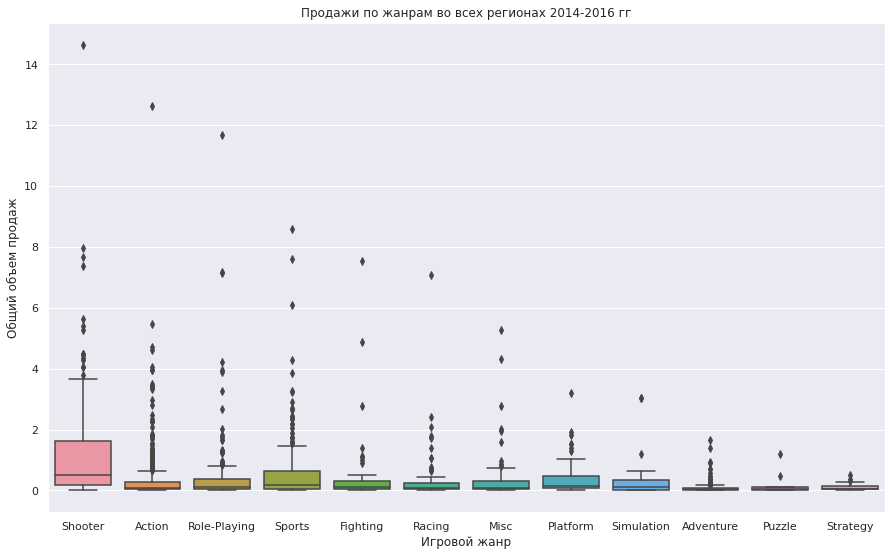

In [ ]:
sns.boxplot(
    x=actual_games.rename(columns={
        'genre':'Игровой жанр'
    })['Игровой жанр'],
    y=actual_games.rename(columns={
        'total_sales':'Общий объем продаж'
    })['Общий объем продаж']
);
sns.set(rc={"figure.figsize":(15, 9)})
plt.title('Продажи по жанрам во всех регионах 2014-2016 гг')
plt.show()

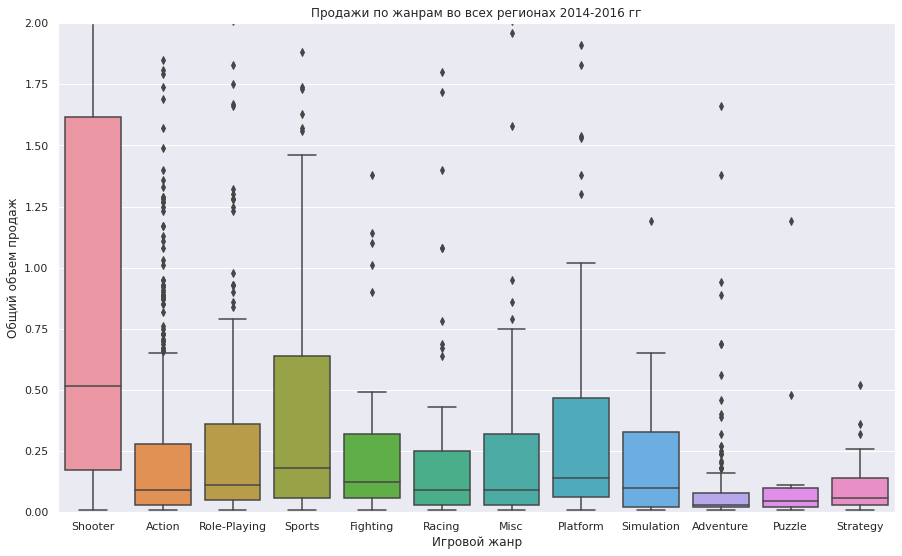

In [ ]:
sns.boxplot(
    x=actual_games.rename(columns={
        'genre':'Игровой жанр'
    })['Игровой жанр'],
    y=actual_games.rename(columns={
        'total_sales':'Общий объем продаж'
    })['Общий объем продаж']
);
sns.set(rc={"figure.figsize":(15, 9)})
plt.title('Продажи по жанрам во всех регионах 2014-2016 гг')
plt.ylim(0,2)
plt.show()

In [ ]:
genre_median=actual_games.pivot_table(index='genre',
                         values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)
genre_median

,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


Text(0.5, 1.0, 'Процентное соотношение игровых жанров во всех регионах')

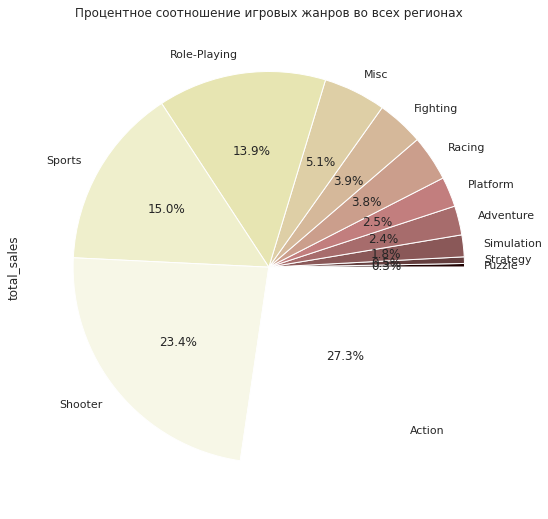

In [ ]:
actual_games.groupby('genre')['total_sales'].sum().sort_values().plot(
    kind='pie',
    figsize=(9,9),
    y='total_sales',
    autopct='%1.1f%%',
    cmap='pink')
plt.title('Процентное соотношение игровых жанров во всех регионах')


In [ ]:
NA_genre=actual_games.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).reset_index()
NA_genre_top5=NA_genre.loc[:5]
NA_genre_top5.loc[5,'genre']='other_genres'
NA_genre_top5.loc[5,'na_sales']=NA_genre.loc[5:,'na_sales'].sum()
EU_genre=actual_games.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index()
EU_genre_top5=EU_genre.loc[:5]
EU_genre_top5.loc[5,'genre']='other_genres'
EU_genre_top5.loc[5,'eu_sales']=EU_genre.loc[5:,'eu_sales'].sum()
JP_genre=actual_games.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index()
JP_genre_top5=JP_genre.loc[:5]
JP_genre_top5.loc[5,'genre']='other_genres'
JP_genre_top5.loc[5,'jp_sales']=JP_genre.loc[5:,'jp_sales'].sum()
#= data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

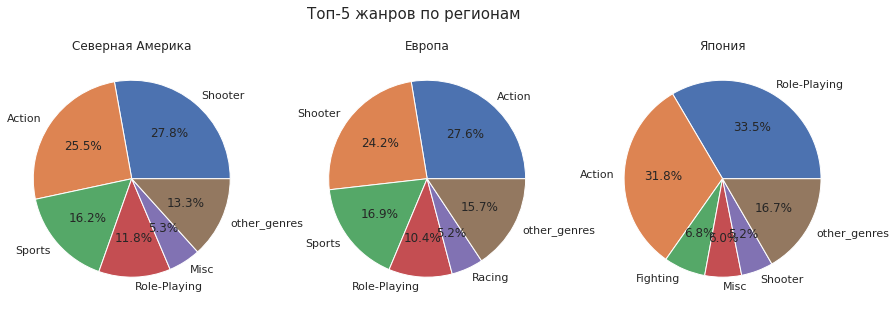

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))


#ax1.plot()
ax1.pie(NA_genre_top5['na_sales'].tolist(), labels=NA_genre_top5['genre'].tolist(), autopct='%1.1f%%')
ax1.set_title('Северная Америка')

ax2.pie(EU_genre_top5['eu_sales'].tolist(), labels=EU_genre_top5['genre'].tolist(), autopct='%1.1f%%')
ax2.set_title('Европа')

ax3.pie(JP_genre_top5['jp_sales'].tolist(), labels=JP_genre_top5['genre'].tolist(), autopct='%1.1f%%')
ax3.set_title('Япония')

fig.suptitle('Топ-5 жанров по регионам', fontsize=15)
plt.show()

<b> Самыми востребованными являются игры в стиле action (бродилки-драки) и спортивные, а наименее - головоломки и стратегии.  

Шаг 4. Составьте портрет пользователя каждого региона. Определите для пользователя каждого региона (NA, EU, JP):

4.1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.

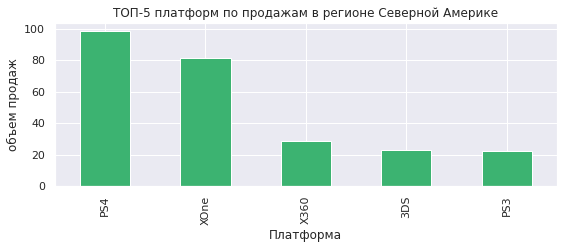

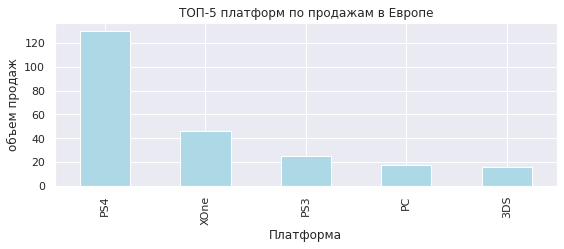

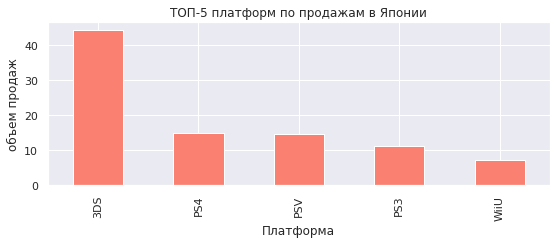

In [ ]:
actual_games.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales',
                                                              ascending=False).head(5).plot.bar(figsize=(9,3), color='mediumseagreen', legend=False)
plt.xlabel('Платформа')
plt.ylabel('объем продаж')
plt.title('ТОП-5 платформ по продажам в регионе Северной Америке')
plt.show()

actual_games.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales',
                                                              ascending=False).head(5).plot.bar(figsize=(9,3), color='lightblue', legend=False)
plt.xlabel('Платформа')
plt.ylabel('объем продаж')
plt.title('ТОП-5 платформ по продажам в Европе')
plt.show()

actual_games.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales',
                                                              ascending=False).head(5).plot.bar(figsize=(9,3), color='salmon',  legend=False)
plt.xlabel('Платформа')
plt.ylabel('объем продаж')
plt.title('ТОП-5 платформ по продажам в Японии')
plt.show()

<b> Можно отметить сходство Северной Америки и Европы в том плане, что в обеих регионах на первом месте стоит платформа PS4, а второе место занимает с небольшим отрывом XOne. Япония по сравнению с другими регионами своеобразна, здесь на первом месте стоит 3DS, второе место занимает PS4, и на третьем находится PSV. Третьи места среди Сев Америки и Европы тоже различаются, там находится X360 и PS3 соответсвенно.

4.2. Самые популярные жанры (топ-5). Поясните разницу.

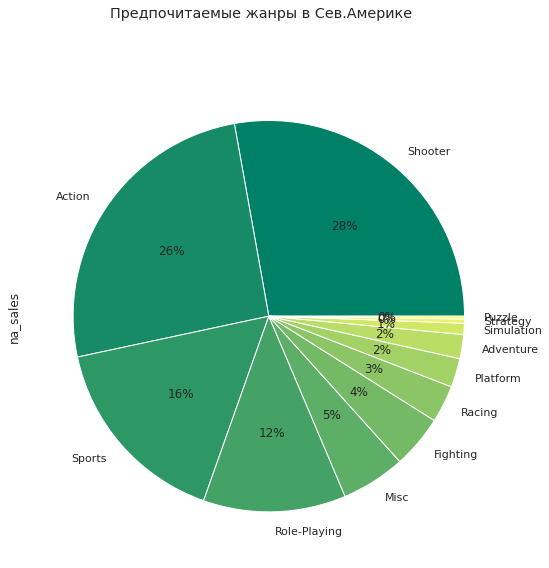

In [ ]:
actual_games.groupby(by='genre').agg({'na_sales':'sum'}).\
sort_values(by='na_sales',
            ascending=False).plot(kind = 'pie',
                                  autopct = '%1.0f%%',
                                  figsize=(9,9),
                                  cmap='summer',
                                  subplots=True,
                                  legend=False,
                                  title = 'Предпочитаемые жанры в Сев.Америке');

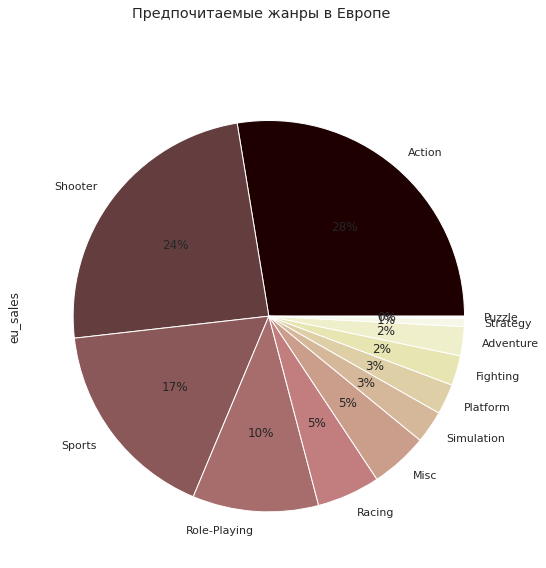

In [ ]:
actual_games.groupby(by='genre').agg({'eu_sales':'sum'}).\
sort_values(by='eu_sales',
            ascending=False).plot(kind = 'pie',
                                  autopct = '%1.0f%%',
                                  figsize=(9,9),
                                  cmap='pink',
                                  subplots=True,
                                  legend=False,
                                  title = 'Предпочитаемые жанры в Европе');

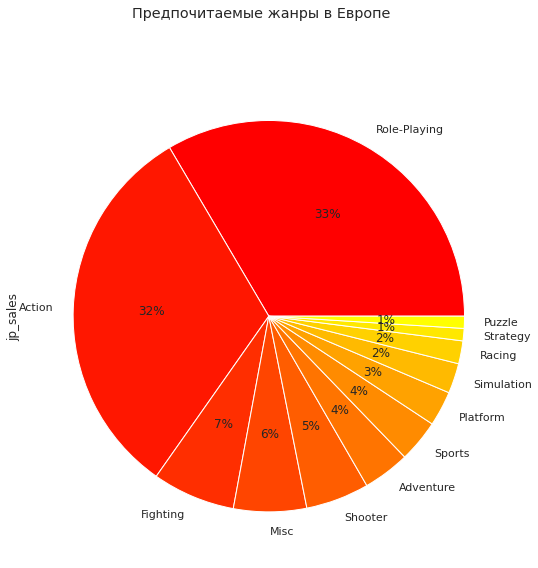

In [ ]:
actual_games.groupby(by='genre').agg({'jp_sales':'sum'}).\
sort_values(by='jp_sales',
            ascending=False).plot(kind = 'pie',
                                  autopct = '%1.0f%%',
                                  figsize=(9,9),
                                  cmap='autumn',
                                  subplots=True,
                                  legend=False,
                                  title = 'Предпочитаемые жанры в Европе');

В Сев Америке первое место в  занимают "стрелялки", в Европе – это Экшен, а в Японии – Ролевые игры. Вторые места  у Сев Америки и Японии – это Экшен, а вот в Европе на втором месте стрелялки. Третье место в Сев Америке и Европе разделили спортивные игры, чего нельзя сказать про Японию, на третьем месте в этой стране популярны файтинги (драки/борьба).

4.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
actual_games[['na_sales', 'rating']].pivot_table(index='rating',
                                          values='na_sales',
                                          aggfunc='sum').sort_values(by='na_sales', ascending=False)

,na_sales
rating,
M,96.42
undefined,64.72
E,50.74
T,38.95
E10+,33.23


In [ ]:
actual_games[['eu_sales', 'rating']].pivot_table(index='rating',
                                          values='eu_sales',
                                          aggfunc='sum').sort_values(by='eu_sales', ascending=False)

,eu_sales
rating,
M,93.44
undefined,58.95
E,58.06
T,34.07
E10+,26.16


In [ ]:
actual_games[['jp_sales', 'rating']].pivot_table(index='rating',
                                          values='jp_sales',
                                          aggfunc='sum').sort_values(by='jp_sales', ascending=False)

,jp_sales
rating,
undefined,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


из таблиц видно, что рейтинг ESRB не сильно влияет на продажи, так как распределение среди рейтингов примерно одинаковое. Исключение составляет Япония, в данном регионе, видимо, пользователи любят кастомные игры, или игры своего собственного производства, так как компания ESRB в основном базируется на оценивании Американских и Канадских компаний. Если посмотреть на диаграммы Европы и Сев Америки повнимательнее, то можно выделить категорию М - для взрослых, она занимает большее место на рынке среди других игр.

Шаг 5. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

H0(нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC равны.

H1 (альтернативная двусторонняя гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC не равны.

Alpha (критический уровень статистической значимости) - 0.01

In [ ]:
xone = actual_games[(actual_games['user_score']!= -1) & (
    actual_games['platform'] == "XOne")][['user_score']]

pc = actual_games[(actual_games['user_score'] != -1) & (
    actual_games['platform'] == "PC")][['user_score']]

alpha = .01
results = st.ttest_ind(xone, pc, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.11601398]
Не получилось отвергнуть нулевую гипотезу


In [ ]:

xone.min(), pc.min()

(user_score    1.6
 dtype: float64,
 user_score    1.4
 dtype: float64)

Не отвергаем гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports равны.

H1 (альтернативная двусторонняя гипотеза) - средние пользовательские рейтинги жанров Action и Sports не равны.

Alpha (критический уровень статистической значимости) - 0.01

In [ ]:
action = actual_games[(actual_games['user_score'] != -1) & (
    actual_games['genre'] == "Action")][['user_score']]

sports = actual_games[(actual_games['user_score'] != -1) & (
    actual_games['genre'] == "Sports")][['user_score']]

alpha = .01   #если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [1.18255504e-14]
Отвергаем нулевую гипотезу


Мы рассмотрели 2 тезиса:
1. Средние пользовательские рейтинги наиболее востребованных (свежих и перспективных)  платформ Xbox One и PC равны. В качестве альтернативной гипотезы приняли, что не равны (двусторонняя гипотеза - значит перевес может быть в сторону любой платформы). В результате проверки нулевую гипотезу не отвергаем, следовательно пользвательские рейтинги игр на этих двух платформах равны.
2. Средние пользовательские рейтинги жанров Action и Sports одинаковые, а в качестве альтернативной гипотезы принимаем - что не равные. Проверка показала, что нулевая гипотеза отвергается, и пользовательские рейтинги разные. Проверим:

In [ ]:
action = actual_games[(actual_games['user_score'] != -1) & (
    actual_games['genre'] == "Action")][['user_score']].mean()

sports = actual_games[(actual_games['user_score'] != -1) & (
    actual_games['genre'] == "Sports")][['user_score']].mean()
print (f'Проверка: средняя  оценка пользователей для игр жанра "Спорт" - {sports}, a жанра Action - {action}')

Проверка: средняя  оценка пользователей для игр жанра "Спорт" - user_score    5.225197
dtype: float64, a жанра Action - user_score    6.760606
dtype: float64


Мы подтвердили  гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые и отвергли гипотезу, что средние пользовательские рейтинги жанров Action и Sports одинаковые, иными словами средние пользовательские рейтинги жанров Action и Sports разные.

<b> Шаг 6. ОБЩИЙ ВЫВОД

Всего в датасете было 16715 записей, мы заменили названия столбцов на нижний регистр, заменили (где получилось) отсутствующие годы выпусков на максимальные  для аналогичного названия, удалили там, где информация о годе выпуска и названия игр отсутствуют. Заменили пропуски в оценках на "-1" (заглушка) и привели к целочисленному типу (что необходимо для расчета корреляции и диаграммы рассеивания), посчитали общий объем продаж.

После обработки данных мы перешли к исследовательскому анализу данных, в ходе которого установили, что рост продаж игр начинается с 1992-93 г., с 2000 до 2009 года наблюдается резкий скачок спроса (с небольшим двухлетним замедлением 2002-2004), а затем годовая стагнация, резкий спад до 2013 г. и вновь стагнация/медленное падение. На 2008 и 2009 год приходится пик продаж, значит в эти года производили больше всего игр (1427 и 1426 игр соответсвенно)  

Наибольшее количество продаж было у игр для PS2, что объясняется популярностью предшествующей PS, также и последующие релизы платформы (как мы уже знаем) стали успешны.
Остальные консоли не могут похвастаться таким объемом продаж. Новые платформы быстро набирают популярность, наращивают/удерживают ее в течение 3-4 лет и затем их продажи снижаются.
Отметим, что из представленного ТОПа не все платформы еще являются актуальными, в частности сменились "поколения", PS уже в 5м издании, X360 уже поменяло несколько поколений XOne. Есть еще ряд факторов, влияющих на появление и исчезновение платформ. Например, PSP некогда был популярен как мобильная версия PS, но с развитием смартфонов данный формат стал неактуален, как и 3DS от Nintendo.

В качестве актуального периода принимаем период с 2014, когда спад интереса прекратился и вышел в период стабильного спроса.
Графики показывают, что спад интереса к играм все таки продолжается, этот спад демонстрируют даже наиболее популярные платформы. Корреляция оценки критиков и общих продаж для PS4 слабая (0.40), в то время как оценка пользователей практически не влияет на продажи (-0.04). Для XOne картина аналогичная: оценка критиков также оказывает слабое влияние (0.42), а оценка пользователей - очень слабое (-0.07). Для платформы PS3 также слабое влияние оценки критиков - 0,45, пользователей - -0,17). Для платформы X360 среднее и слабо-отрицательное соответственно (0,53 и -0,14 соответственно). Чем можно объяснить? Вероятно, более свежие релизы платформ еще достаточно сырые и не все ньюансы отлажены.

Что касается региональных портретов пользователей, можно отметить сходство Северной Америки и Европы в том плане, что в обоих регионах на первом месте стоит платформа PS4, а второе место занимает с небольшим отрывом XOne. Япония по сравнению с другими регионами своеобразна, здесь на первом месте стоит 3DS, второе место занимает PS4, и на третьем находится PSV. Третьи места среди Сев Америки и Европы тоже различаются, там находится X360 и PS3 соответсвенно. В Сев Америке первое место в занимают "стрелялки", в Европе – это Экшен, а в Японии – Ролевые игры. Вторые места у Сев Америки и Японии – это Экшен, а вот в Европе на втором месте стрелялки. Третье место в Сев Америке и Европе разделили спортивные игры, чего нельзя сказать про Японию, на третьем месте в этой стране популярны файтинги (драки/борьба).  рейтинг ESRB не сильно влияет на продажи, так как распределение среди рейтингов примерно одинаковое. Исключение составляет Япония, в данном регионе, видимо, пользователи любят кастомные игры, или игры своего собственного производства, так как компания ESRB в основном базируется на оценивании Американских и Канадских компаний. Если посмотреть на диаграммы Европы и Сев Америки повнимательнее, то можно выделить категорию М - для взрослых, она занимает большее место на рынке среди других игр.
Можно сделать вывод, что вкусовые предпочтения зависят от культуры и места проживания, так как во всех регионах показатели сильно разнятся.

Мы рассмотрели 2 тезиса:

1. Средние пользовательские рейтинги наиболее востребованных (свежих и перспективных) платформ Xbox One и PC равны. В качестве альтернативной гипотезы приняли, что не равны (двусторонняя гипотеза - значит перевес может быть в сторону любой платформы). В результате проверки нулевую гипотезу не отвергаем, следовательно пользвательские рейтинги игр на этих двух платформах равны.
2. Средние пользовательские рейтинги жанров Action и Sports одинаковые, а в качестве альтернативной гипотезы принимаем - что не равные. Проверка показала, что нулевая гипотеза отвергается, и пользовательские рейтинги разные (у Action выше).

Итак, наибольшее внимание лучше обратить платформы PS4 и XOne (как более новые и имеющие в запасе несколько лет развития и роста), наиболее распространенный жанр - Action, он имеет более высокие оценки пользователей, но основной упор имеет смысл делать на игры в стиле Shooter и  Sports (для североамериканского и европейского региона), т.к. они наиболее доходные, а для специфичного Японского рынка сделать упор на ролевые игры.
Основной упор на североамериканском и европейском рынке можно делать на игры для взрослых категорий пользователей, при этом из-за различий в структуризации по Японии нет возможности опеределить рейтинг, т.к. рейтинг ESBR там не актуален. Отзывы критиков оказывают умеренное влияние на продажи, а отзывы пользователей имеют слабую отрицательную корреляцию, поэтому не являются решающими в определении стратегии маркетинговой кампании.
